# Análisis Exploratorio de Datos

## Cargar datos

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

### Conversión en el tipo de dato de algunas columnas

In [50]:
# Convertir fechas
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
valores_clima = df['Weather Condition'].unique()
print(valores_clima)

['Rainy' 'Sunny' 'Cloudy' 'Snowy']


In [52]:
# Convertir las condiciones climaticas
weather_map = {'Sunny': 0, 'Rainy': 1, 'Cloudy': 2, 'Snowy': 3}
df['Weather_Code'] = df['Weather Condition'].map(weather_map)

In [53]:
df['Seasonality_Code'] = df['Seasonality'].astype('category').cat.codes
df["Category Code"] = df["Category"].astype("category").cat.codes
category_dict = dict(enumerate(df["Category"].astype("category").cat.categories))

category_dict

{0: 'Clothing', 1: 'Electronics', 2: 'Furniture', 3: 'Groceries', 4: 'Toys'}

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [59]:
df.describe()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Weather_Code,Seasonality_Code,Category Code
count,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,2022-12-31 23:59:59.999999744,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077,1.499508,1.501806,2.001696
min,2022-01-01 00:00:00,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000,0.000000,0.000000,0.000000
25%,2022-07-02 00:00:00,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000,0.000000,1.000000,1.000000
50%,2023-01-01 00:00:00,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000,1.000000,2.000000,2.000000
75%,2023-07-03 00:00:00,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000,2.000000,3.000000,3.000000
max,2024-01-01 00:00:00,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000,3.000000,3.000000,4.000000
std,NaN,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408,1.118188,1.117159,1.414261


### Número de tiendas

In [8]:
tiendas = df['Store ID'].nunique()
print(f"El dataset contiene {tiendas} tiendas")

El dataset contiene 5 tiendas


### Número de productos

In [9]:
productos = df['Product ID'].nunique()
print(f"El dataset contiene {productos} tipos de productos")

El dataset contiene 20 tipos de productos


### Cantidad de productos por tienda

In [10]:
tiendas = df['Store ID'].value_counts()
print(tiendas)

Store ID
S001    14620
S002    14620
S003    14620
S004    14620
S005    14620
Name: count, dtype: int64


### Cantidad de productos por categoría

In [11]:
categorias = df['Category'].value_counts()
print(categorias)

Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64


## Filtrar datos
Filtrando datos para un dataset más pequeño para entrenamiento.

Para que el proyecto no se vuelva inviable, es necesario bajar su complejidad. Esto se puede lograr a través de la selección de un solo producto y entrenar al agente solamente con dicho producto.

A continuación se muestra el análisis de precios para el producto P0001. Esto con el objetivo de entender la distribución de precios y cómo varían según la tienda.

<Figure size 800x500 with 0 Axes>

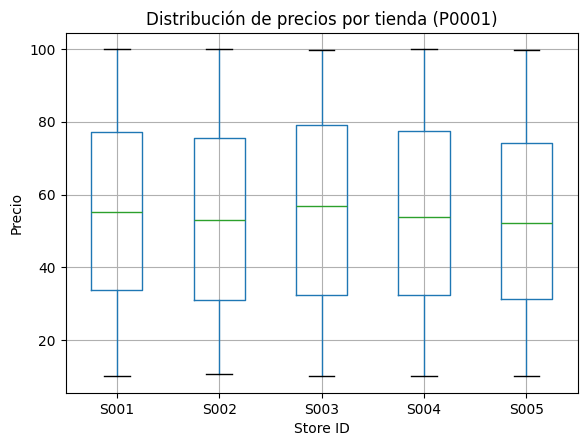

In [60]:
import os

precios_p0001 = df[df['Product ID'] == 'P0001'][['Date', 'Store ID', 'Price']]


output_path = '../results/plots/eda/' # Para guardar los plots
output_dir = os.path.dirname(output_path)
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(8, 5))
precios_p0001.boxplot(column='Price', by='Store ID')
plt.title("Distribución de precios por tienda (P0001)")
plt.suptitle("")  # quitar título duplicado
plt.xlabel("Store ID")
plt.ylabel("Precio")
plt.savefig(output_path + 'precios_p0001.png')
plt.show()

En el boxplot de arriba, se observa que los precios varían dentro de cada tienda, pero entre tiendas, los precios para P0001 son similares.
Esto es una buena noticia, ya que es posible crear un dataset solo con los datos de P0001 y simulando que todos los P0001 son de la misma tienda. 

Esto nos permite crear un dataset que esencialmente es una sola tienda con una historia muy larga (al concatenar las historias de S001, S002, etc.)

A continuación, se procede a generar el dataset.

In [61]:
# Filtrar dataset por product P0001
df = df[df['Product ID'] == 'P0001']
# Ordenamos el dataset por tienda y fecha
df_p0001 = df.sort_values(['Store ID', 'Date']).copy()
# Creamos la variable step que sera utilizada por el entorno
df_p0001['Step'] = range(len(df_p0001))
# Resetear índice
df_p0001.reset_index(drop=True, inplace=True)

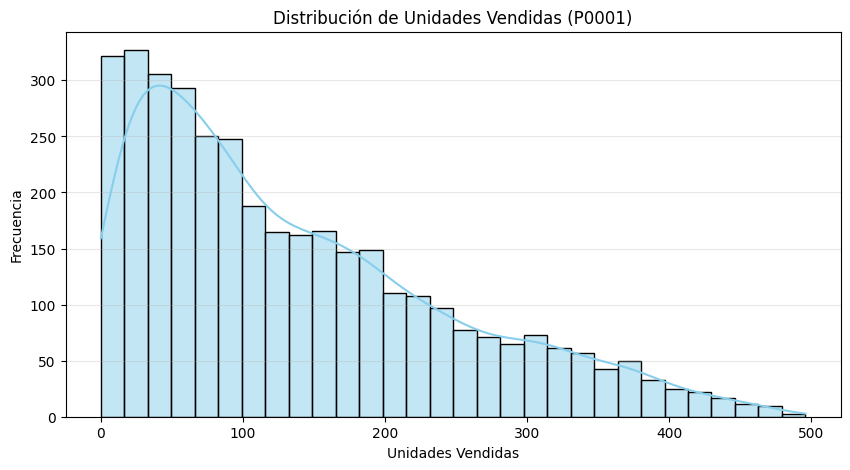

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(df_p0001['Units Sold'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Unidades Vendidas (P0001)')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.savefig(output_path + 'Distribucion_unidades_vendidas.png')
plt.show()

Este histograma visualiza la frecuencia de las Units Sold (Unidades Vendidas) para el producto P0001, superponiendo una curva de densidad (KDE) para facilitar la lectura. El gráfico revela una distribución con un ligero sesgo positivo (cola hacia la derecha), lo que indica que la gran mayoría de los días registran un volumen de ventas moderado, mientras que los días con ventas excepcionalmente altas son eventos poco frecuentes. Esta concentración de datos sugiere una demanda base relativamente estable, lo cual facilita el entrenamiento del agente, ya que le permite aprender un patrón de comportamiento "normal" consistente antes de tener que optimizar decisiones para los picos de demanda atípicos.

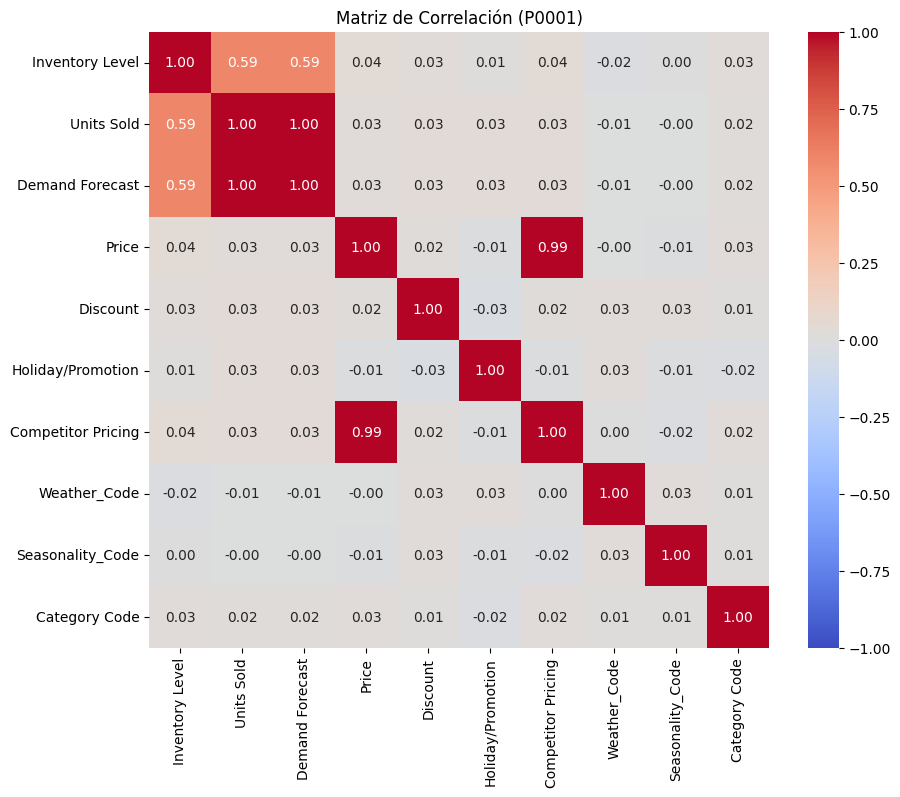

In [65]:
plt.figure(figsize=(10, 8))

# Lista actualizada con TODAS las variables visibles en tu imagen
cols_corr = [
    'Inventory Level',    # Asumo que esta existe en tu DF aunque no salga en la captura
    'Units Sold',         # Reward (parte de la recompensa)
    'Demand Forecast',    # State (Observación)
    'Price',              # State
    'Discount',           # State / Action (dependiendo de si controlas precios)
    'Holiday/Promotion',  # Contexto externo crítico
    'Competitor Pricing', # State
    'Weather_Code',       # Perturbación externa
    'Seasonality_Code',   # Contexto temporal
    'Category Code'       # Identificador de tipo de producto
]

corr = df_p0001[cols_corr].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación (P0001)')
plt.savefig(output_path + 'Matriz_correlacion.png')
plt.show()

Este mapa de calor (heatmap) representa la matriz de correlación entre las variables numéricas clave del dataset filtrado para P0001, tales como Inventory Level, Units Sold, Price, Discount, y variables externas como Weather_Code y Holiday/Promotion. Los colores y los valores numéricos dentro de cada celda (que van de -1 a 1) indican la fuerza y la dirección de la relación lineal entre pares de variables. Este mapa de calor revela que la mayoría de las variables no presentan correlaciones lineales fuertes, lo que refleja la complejidad de la demanda donde factores como el clima o las festividades interactúan de manera no lineal en lugar de directa. Sin embargo, destaca una correlación perfecta entre las unidades vendidas y las estimación de la demanda, lo que puede hacer que el agente ignore el resto de variables y solo realice acciones a partir de esta. 

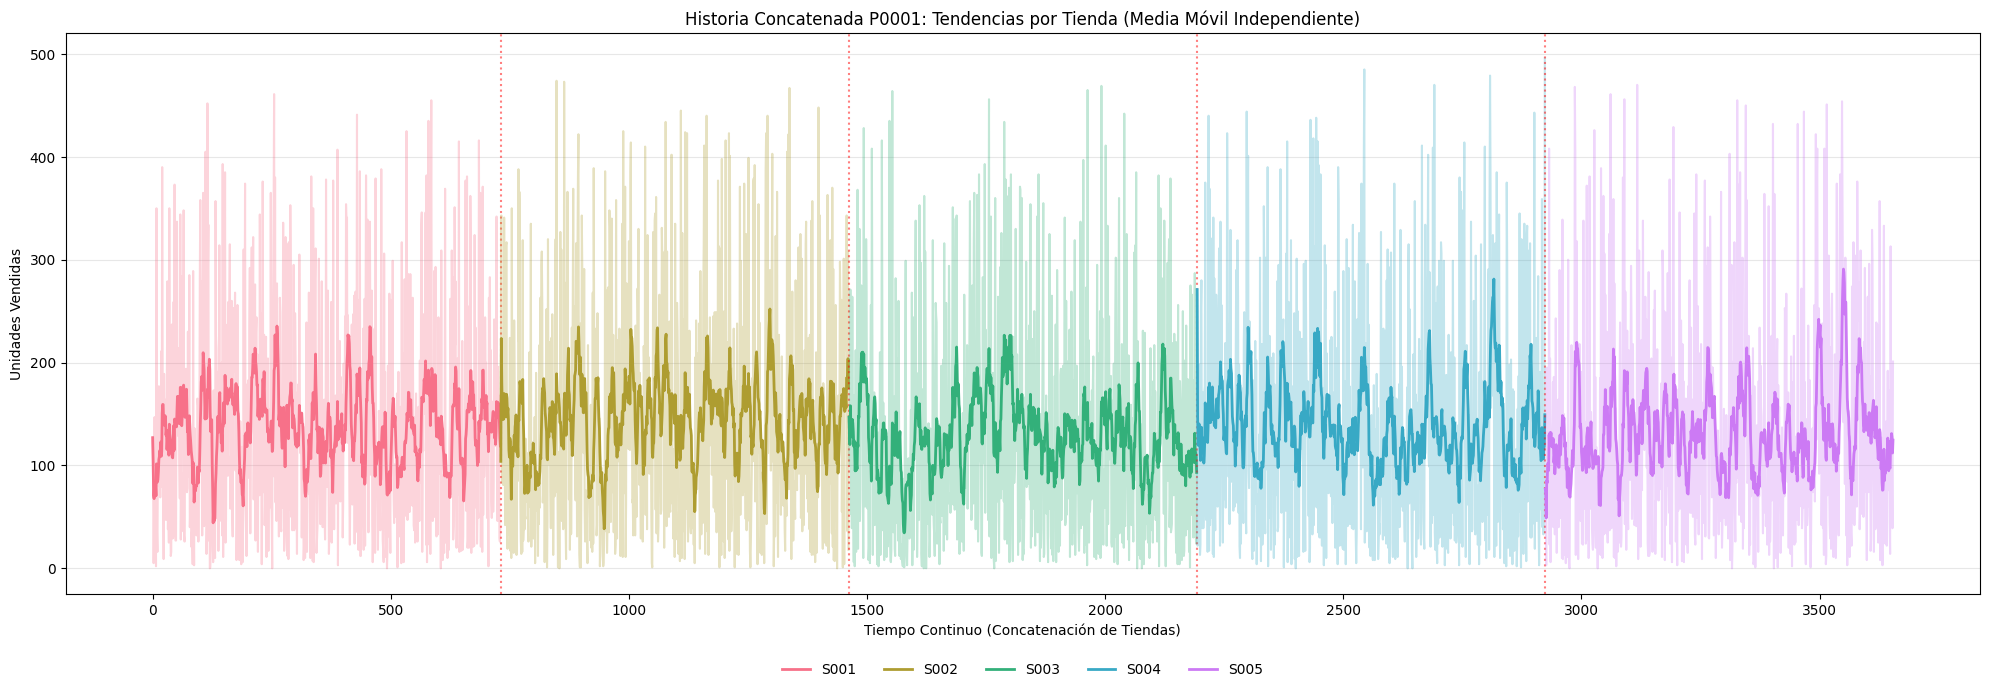

In [47]:
# 3. Plotear
plt.figure(figsize=(20, 7))

# 2. Calcular media móvil por tienda
# Usamos transform() agrupando por Store ID. 
# Esto hace que la media del primer día de la tienda S002 no use datos de S001.
df_p0001['MA_7'] = df_p0001.groupby('Store ID')['Units Sold'].transform(
    lambda x: x.rolling(window=10, min_periods=1).mean()
)

stores = df_p0001['Store ID'].unique()
colors = sns.color_palette("husl", len(stores))


for i, store in enumerate(stores):
    subset = df_p0001[df_p0001['Store ID'] == store]
    color = colors[i]
    
    # media móvil (Línea sólida principal)
    # Se dibuja sobre el Step para mantener la concatenación
    plt.plot(subset['Step'], subset['MA_7'], 
             color=color, linewidth=2, label=f'{store}')
    
    # Datos reales (Fondo transparente)
    plt.plot(subset['Step'], subset['Units Sold'], 
             color=color, alpha=0.30)
    
    # Separador vertical
    if i < len(stores) - 1:
        plt.axvline(x=subset['Step'].max() + 0.5, color='red', linestyle=':', alpha=0.5)

plt.title('Historia Concatenada P0001: Tendencias por Tienda (Media Móvil Independiente)')
plt.xlabel('Tiempo Continuo (Concatenación de Tiendas)')
plt.ylabel('Unidades Vendidas')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(stores), frameon=False)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(output_path + 'Serie_de_tiempo.png')
plt.show()

Este gráfico de líneas muestra la evolución temporal de las unidades vendidas del producto P0001 para cada tienda, utilizando una media móvil de 10 días para suavizar el "ruido" diario y revelar tendencias más claras. El análisis de este gráfico nos permite observar si existen patrones de estacionalidad compartidos entre las tiendas o si alguna ubicación tiene un comportamiento anómalo. La estabilidad o sincronía que se observe aquí es fundamental: si las curvas de las diferentes tiendas siguen tendencias similares (suben y bajan en los mismos periodos), refuerza aún más la decisión de entrenar un único agente global, ya que el patrón de demanda es el mismo independientemente de la ubicación física.

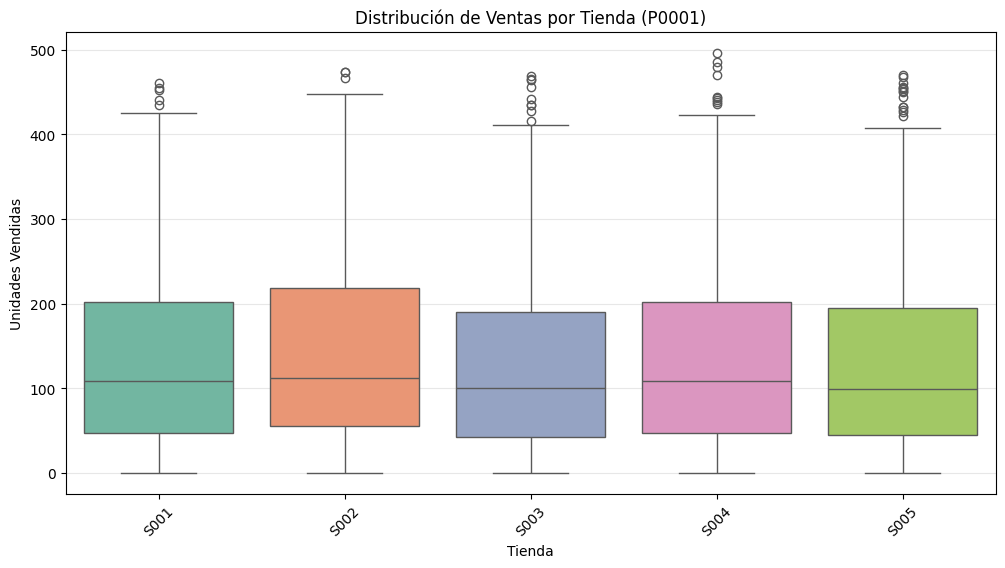

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_p0001, x='Store ID', y='Units Sold', hue='Store ID', legend=False,palette='Set2')
plt.title('Distribución de Ventas por Tienda (P0001)')
plt.xlabel('Tienda')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.savefig(output_path + 'distribucion_ventas_tienda.png')
plt.show()

Este gráfico boxplot visualiza la distribución estadística de los precios del producto P0001 a través de las diferentes tiendas (Store ID). Cada "caja" representa el rango intercuartílico (donde se concentra el 50% de los datos centrales), con la línea central indicando la mediana del precio. Este gráfico es fundamental para validar la hipótesis del proyecto: muestra que, aunque los precios varían dentro de una misma tienda, el comportamiento general de los precios es muy similar entre todas las tiendas, lo que justifica la decisión de unificar los datos de todas las tiendas en un solo conjunto de entrenamiento para el agente.

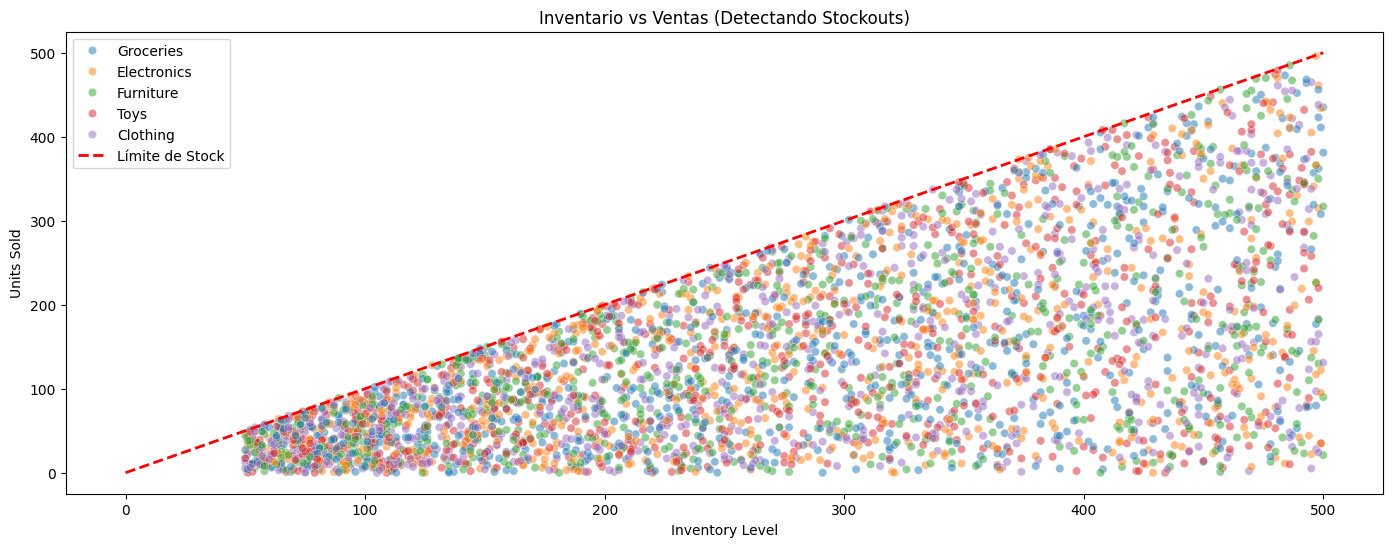

In [43]:
plt.figure(figsize=(17, 6))

# Muestra aleatoria de 2000 puntos para no saturar
sns.scatterplot(data=df_p0001, x='Inventory Level', y='Units Sold', hue='Category', alpha=0.5)
# Línea roja y=x (Donde Ventas = Inventario)
plt.plot([0, 500], [0, 500], 'r--', linewidth=2, label='Límite de Stock')
plt.title('Inventario vs Ventas (Detectando Stockouts)')
plt.legend()
plt.savefig(output_path + 'inventario_ventas.png')
plt.show()

Este gráfico de dispersión cruza el Nivel de Inventario (eje X) con las Unidades Vendidas (eje Y). La línea roja punteada representa el límite físico donde Ventas = Inventario. Todos los puntos que caen exactamente sobre la línea roja representan días de "Stockout" o rotura de stock (se vendió todo lo que había). La presencia de puntos en esta línea indica oportunidades perdidas de venta. Para el agente, esto visualiza el riesgo que debe evitar: su objetivo será aprender a mantener el inventario en la zona "segura" (debajo de la línea roja) pero sin alejarse demasiado hacia la derecha (exceso de stock), encontrando el equilibrio óptimo.

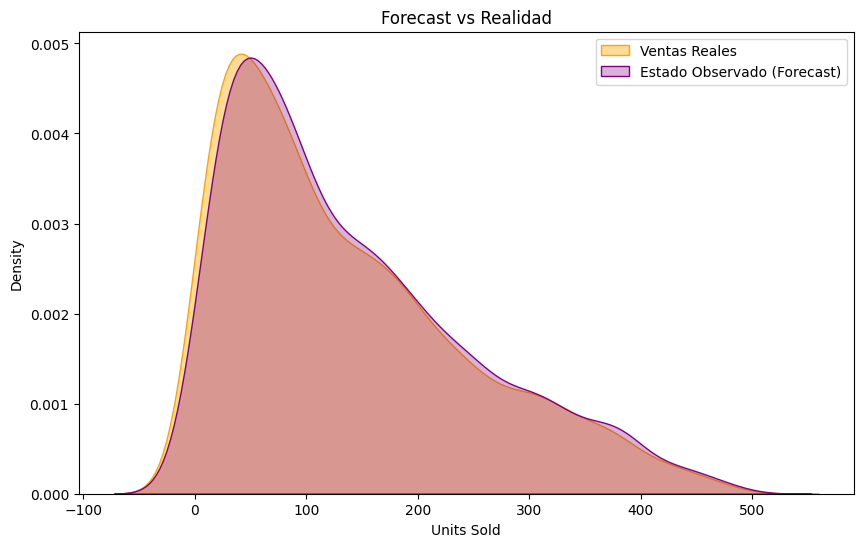

In [66]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_p0001['Units Sold'], fill=True, color='orange', label='Ventas Reales', alpha=0.4)
sns.kdeplot(df_p0001['Demand Forecast'], fill=True, color='purple', label='Estado Observado (Forecast)', alpha=0.3)
plt.title('Forecast vs Realidad')
plt.savefig(output_path + 'forecast_vs_realidad.png')
plt.legend()
plt.show()

Este gráfico de densidad (KDE) superpone dos distribuciones: la de las ventas reales (Units Sold) y la del pronóstico de demanda (Demand Forecast). La conclusión crítica de este análisis surge al observar el solapamiento casi perfecto entre ambas curvas. Esta similitud extrema es una señal de alerta, ya que podría indicar un posible "data leakage" (fuga de información) en la construcción del dataset. Si el pronóstico es idéntico a la realidad, existe un alto riesgo de que el algoritmo se sesgue y aprenda a guiarse únicamente por este valor, "haciendo trampa" en lugar de aprender la dinámica real del mercado, lo cual inutilizaría el modelo en un escenario real donde los pronósticos nunca son perfectos.

In [8]:
stores = {}
df = df[df['Product ID'] == 'P0001']
for store_id, df_store in df.groupby("Store ID"):
    df_store = df_store.sort_values("Date").reset_index(drop=True)
    stores[store_id] = {
        "data": df_store.to_numpy(),
        "inv_max": df_store["Inventory Level"].max(),
        "forecast_max": df_store["Demand Forecast"].max(),
        "price_max": df_store["Price"].max(),
        "discount_max": df_store["Discount"].max(),
        "competitor_max": df_store["Competitor Pricing"].max(),
        "weather_max": df_store["Weather_Code"].max(),
        "season_max": df_store["Seasonality_Code"].max(),
        "category_max": df_store["Category Code"].max()
    }

In [9]:
import pickle

with open("../data/stores.pkl", "wb") as f:
    pickle.dump(stores, f)

In [10]:
df_store.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weather_Code,Seasonality_Code,Category Code
0,2022-01-01,S005,P0001,Toys,West,111,77,60,83.47,70.33,10,Cloudy,0,70.29,Winter,2,3,4
1,2022-01-02,S005,P0001,Groceries,East,223,67,53,74.80,67.49,5,Sunny,0,65.24,Winter,0,3,3
2,2022-01-03,S005,P0001,Groceries,North,159,3,145,18.12,36.30,0,Snowy,0,34.96,Winter,3,3,3
3,2022-01-04,S005,P0001,Furniture,North,383,195,175,214.04,21.71,20,Rainy,0,24.12,Winter,1,3,2
4,2022-01-05,S005,P0001,Toys,South,371,74,115,93.27,40.47,20,Cloudy,0,40.30,Spring,2,1,4


In [17]:
for i, col in enumerate(df_store.columns):
    print(i, col)

0 Date
1 Store ID
2 Product ID
3 Category
4 Region
5 Inventory Level
6 Units Sold
7 Units Ordered
8 Demand Forecast
9 Price
10 Discount
11 Weather Condition
12 Holiday/Promotion
13 Competitor Pricing
14 Seasonality
15 Weather_Code
16 Seasonality_Code
17 Category Code
